# PROBLEMS IN GRAPH THEORY

- Graph traversal: How to walk through a graph, discussed at https://en.wikipedia.org/wiki/Graph_traversal
- Graph coloring: How to color nodes in a graph such that no two adjacent vertices share the same color, discussed at https://en.wikipedia.org/wiki/Graph_coloring
- Connected components: How to find connected components in a graph, explained at https://en.wikipedia.org/wiki/Connected_component_%28graph_theory%29
- Shortest paths: What is the shortest path from one node to another in a given graph?, discussed at https://en.wikipedia.org/wiki/Shortest_path_problem
- Hamiltonian paths: Does a graph include a Hamiltonian path, visiting every vertex exactly once?, explained at https://en.wikipedia.org/wiki/Hamiltonian_path
- Eulerian paths: Does a graph include an Eulerian path, visiting every edge exactly once?, discussed at https://en.wikipedia.org/wiki/Eulerian_path
- Traveling salesman problem: What is the shortest route visiting every node exactly once (Hamiltonian path)?, explained at https://en.wikipedia.org/wiki/Traveling_salesman_problem

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 10  # Number of nodes in the graph.
# Each node is connected to the two next nodes,
# in a circular fashion.
adj = [(i, (i + 1) % n) for i in range(n)]
adj += [(i, (i + 2) % n) for i in range(n)]

In [3]:
g = nx.Graph(adj)

In [4]:
print(g.nodes())
print(g.edges())
print(nx.adjacency_matrix(g))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 9), (0, 2), (0, 8), (1, 2), (1, 3), (1, 9), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7), (6, 8), (7, 8), (7, 9), (8, 9)]
  (0, 1)	1
  (0, 2)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 9)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1
  (3, 4)	1
  (3, 5)	1
  (4, 2)	1
  (4, 3)	1
  (4, 5)	1
  (4, 6)	1
  (5, 3)	1
  (5, 4)	1
  (5, 6)	1
  (5, 7)	1
  (6, 4)	1
  (6, 5)	1
  (6, 7)	1
  (6, 8)	1
  (7, 5)	1
  (7, 6)	1
  (7, 8)	1
  (7, 9)	1
  (8, 0)	1
  (8, 6)	1
  (8, 7)	1
  (8, 9)	1
  (9, 0)	1
  (9, 1)	1
  (9, 7)	1
  (9, 8)	1


Let's display this graph. NetworkX comes with a variety of drawing functions. We can either specify the nodes' positions explicitly, or we can use an algorithm to automatically compute an interesting layout. Here, we use the draw_circular() function that simply positions nodes linearly on a circle:


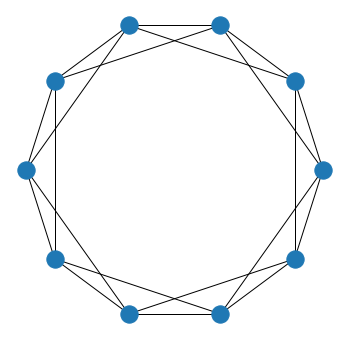

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_circular(g, ax=ax)

Graphs can be modified easily. Here, we add a new node connected to all existing nodes. We also specify a color attribute to this node. In NetworkX, every node and edge comes with a Python dictionary containing arbitrary attributes.


In [7]:
g.add_node(n, color='#fcff00')
# We add an edge from every existing
# node to the new node.
for i in range(n):
    g.add_edge(i, n)

Now, let's draw the modified graph again. This time, we specify the nodes' positions and colors explicitly:


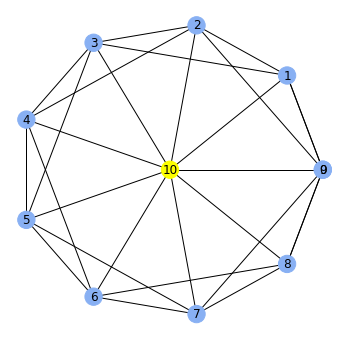

In [8]:
# We define custom node positions on a circle
# except the last node which is at the center.
t = np.linspace(0., 2 * np.pi, n)
pos = np.zeros((n + 1, 2))
pos[:n, 0] = np.cos(t)
pos[:n, 1] = np.sin(t)

# A node's color is specified by its 'color'
# attribute, or a default color if this attribute
# doesn't exist.
color = [g.node[i].get('color', '#88b0f3')
         for i in range(n + 1)]

# We now draw the graph with matplotlib.
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g, pos=pos, node_color=color, ax=ax)
ax.set_axis_off()

Let's also use an automatic layout algorithm:


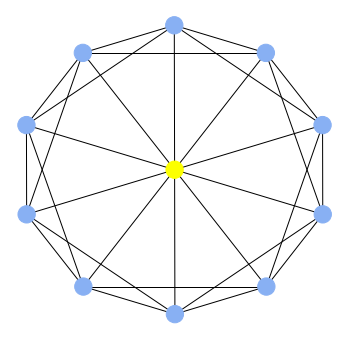

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_spectral(g, node_color=color, ax=ax)
ax.set_axis_off()